<a href="https://colab.research.google.com/github/AdrianoCorreia94/databases_project/blob/master/trabalho_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-04-07 16:53:16--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  --.-KB/s    in 0.1s    

2025-04-07 16:53:16 (130 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.27 MiB | 9.12 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

Acurácia do modelo: 0.8911


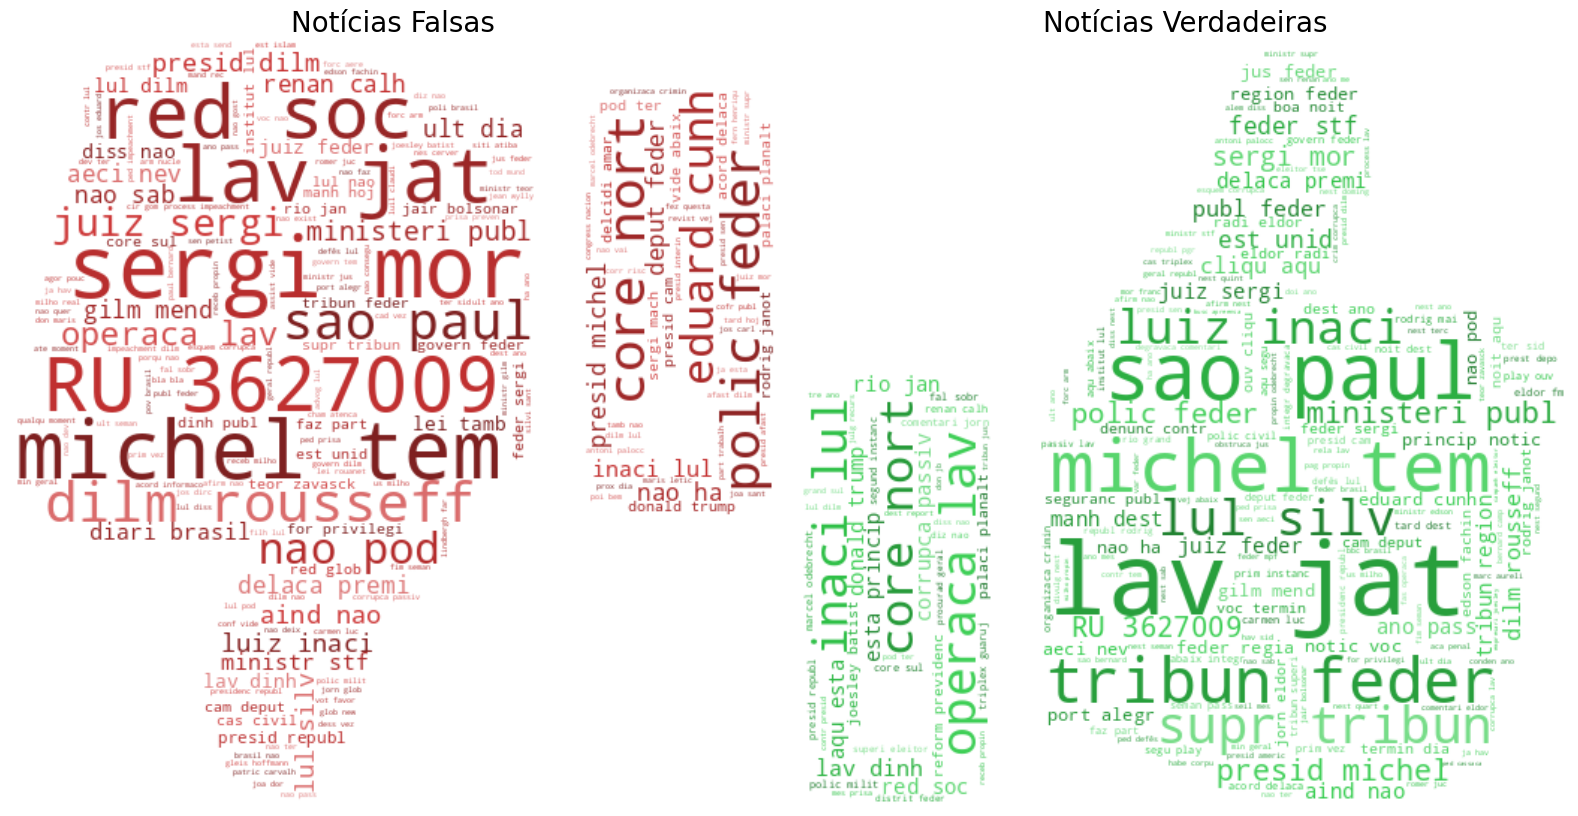

In [2]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

import numpy as np
import pandas as pd
import re, os
import regex
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt

import nltk
nltk.download('all')
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from wordcloud import WordCloud

def preparar_dados(dados):
  # 1.1 Tokenizar
  tks = nltk.word_tokenize(dados)

  # 1.2 retirada de acentos e números
  tks = [re.sub(r'[^\w\s]', '', token) for token in tks]
  tks = [re.sub(r'\d+', '', token) for token in tks]


  dados = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", dados)
  dados = re.sub(r",", " , ", dados)
  dados = re.sub(r"!", " ! ", dados)
  dados = re.sub(r"\(", " \( ", dados)
  dados = re.sub(r"\)", " \) ", dados)
  dados = re.sub(r"\?", " \? ", dados)
  dados = re.sub(r"\s{2,}", " ", dados) # substitui espacos em brancos seguidos (tabs, quebra de linha)
  cleanr = re.compile('<.*?>') # encontra tags html
  dados = re.sub(r'\d+', '', dados) # remocao de numeros
  dados = re.sub(cleanr, '', dados) # remove as tags html
  dados = re.sub(r"\'", "", dados) # remove as aspas simples
  dados = re.sub(r"\"", "", dados) # remove as aspas duplas
  dados = re.sub(r"\W+","", dados) # remove tudo o que nao é alfanumerico ou sublinhado _



  # 1.3 minúsculas
  tks = [token.lower() for token in tks if token.isalpha()]

  # 1.4 Retirar stopwords e pontuações
  stop_words = set(stopwords.words('portuguese'))
  tks = [token for token in tks if token not in stop_words]

  # 1.5 lematizacao
  stemmer = RSLPStemmer()
  tks = [stemmer.stem(token) for token in tks]

  # truncamento
  max_tks = 100 # Define o numero máximo de palavras
  tks = tks[:min(len(tks), max_tks)]

  # remontar a notícia em string
  preprocessed_text = ' '.join(tks)

  return preprocessed_text


df = pd.read_csv("pre-processed.csv")
df['news'] = df['preprocessed_news'].apply(preparar_dados)

# matriz TF-IDF com ngramas de 1 a 3 palavras
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(df['news'])
y = df['label'].map({'fake': 0, 'real': 1})

# vetorizador
vetor = TfidfVectorizer(ngram_range=(1,3))

# aplicando vetor no df
x = vetor.fit_transform(df['news'])
y = df['label'].map({'fake': 0, 'true': 1})

# divisao treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# modelo de regressão logística
model = LogisticRegression(solver='liblinear', max_iter=1000, C=17)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')

# funcao para gerar a nuvem de palavras
def gerar_nuvem(corpus, mascara, rotulo):
  # corpus recebe as noticias rotuladas (fake ou true)
  # mascara: caminho da imagem para nuvem de palavras
  # rotulo: para retornar as palavras em tom de verde ou vermelho

  mascara = np.array(Image.open(mascara)) # carregar a imagem da mascara

  vectorizer = CountVectorizer(ngram_range=(2,2)) # vetor para contar as frequencias
  bow = vectorizer.fit_transform(corpus)

  sum_words = bow.sum(axis=0) # soma da frequencia de cada palavra ou bigrama
  words_freq = [(word, sum_words[0, i]) for word, i in vectorizer.vocabulary_.items()] # lista de tupla com a palavra/bigrama e frequencia com que aparece
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) # ordena a lista

  words_freq = dict(words_freq) # transforma em dicionario
  words_freq['RU 3627009'] = 400 # adicinar identificador no dicionario com uma frequencia aleatoria.

  # funcao para deixar as palavras em tom de verde - true news
  def tons_de_verde(word, font_size, position, orientation, random_state=None, **kwargs):
      return "hsl(130, 60%%, %d%%)" % np.random.randint(30, 70)

  # funcao para deixar as palavras em tom de vermelho - fake news
  def tons_de_vermelho(word, font_size, position, orientation, random_state=None, **kwargs):
      return "hsl(0, 60%%, %d%%)" % np.random.randint(30, 70)

  return WordCloud(width=800, height=400, background_color='white', mask=mascara).generate_from_frequencies(words_freq).recolor(color_func=tons_de_verde) if rotulo.lower() == 'real' else WordCloud(width=800, height=400, background_color='white', mask=mascara).generate_from_frequencies(words_freq).recolor(color_func=tons_de_vermelho)


fakes = df['news'][df['label'] == 'fake'] # separacao das fake news
reais = df['news'][df['label'] == 'true'] # separacao das noticias verdadeiras


nuvem_fake = gerar_nuvem(fakes,'/content/thumbs_down_mask.png', 'fake') # chamada da funcao gerar nuvem com fake news
nuvem_real = gerar_nuvem(reais, '/content/thumbs_up_mask.png', 'real') # chamada da funcao gerar nuvem das noticias verdadeiras

# imprimir
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(nuvem_fake, interpolation='bilinear')
plt.title('Notícias Falsas', fontsize=20)
plt.axis('off')

#plt.tight_layout()
#plt.show()

#plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.imshow(nuvem_real, interpolation='bilinear')
plt.title('Notícias Verdadeiras', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()